<a href="https://colab.research.google.com/github/gantasrilaitha/customer-segmentation/blob/main/customer(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Reading CSV file
df=pd.read_csv("/content/drive/MyDrive/Mall_Customers.csv")
print(df.shape) 
df.head(5)

(200, 5)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#Renaming Column
df.rename(columns={"Genre":"Gender"}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df. describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
print(df.dtypes)
z=df.dtypes.value_counts()
#print(z[0])
print(z)

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object
int64     4
object    1
dtype: int64


In [ ]:
df.isnull().sum() 

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There are no null values

In [ ]:
duplicate = df[df.duplicated()]
duplicate #no duplicate records

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


There are no duplicate fields

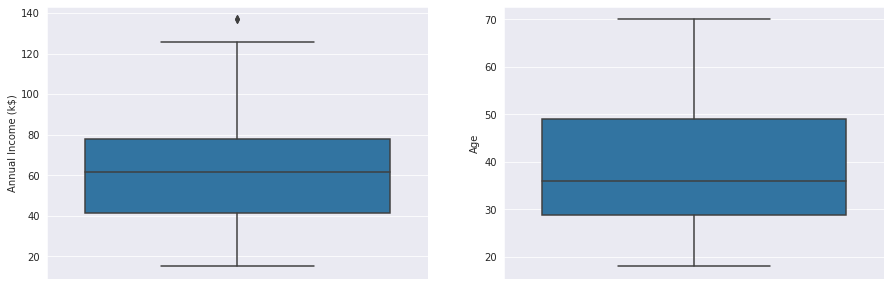

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=df, y="Annual Income (k$)")
#plt.subplot(1,2,2)
#sns.boxplot(data=df, y="Spending Score (1-100)")
plt.subplot(1,2,2)
sns.boxplot(data=df, y="Age")
plt.show()

There is 1 outlier in Annual Income

In [ ]:
k=df
from scipy import stats
k['z_score']=stats.zscore(k['Annual Income (k$)'])
k=k.loc[k['z_score'].abs()<=2.9]

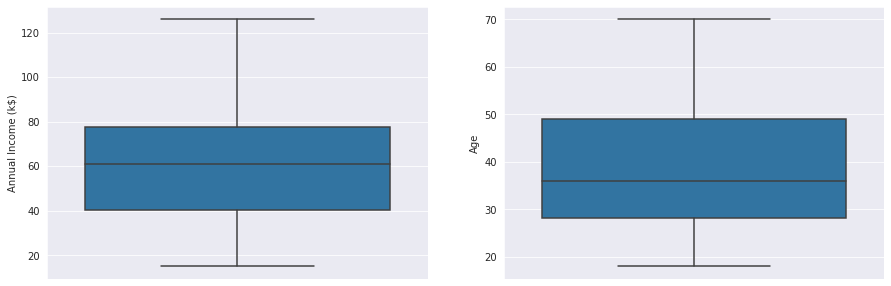

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=k, y="Annual Income (k$)")

plt.subplot(1,2,2)
sns.boxplot(data=k, y="Age")
plt.show()

Outlier Removed

In [ ]:
#Verifying if there are outliers using IQR Range
Q1 = np.percentile(k['Annual Income (k$)'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(k['Annual Income (k$)'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
upper=Q3+1.5*IQR
upper_array=np.array(k['Annual Income (k$)']>=upper)
print('Upper Bound:',upper)
print(upper_array)
 
#Below Lower bound
lower=Q1-1.5*IQR
lower_array=np.array(k['Annual Income (k$)']<=lower)
print('Lower Bound:',lower)
print(lower_array)


Upper Bound: 132.25
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False 

No outliers

**Finding male & female customers**

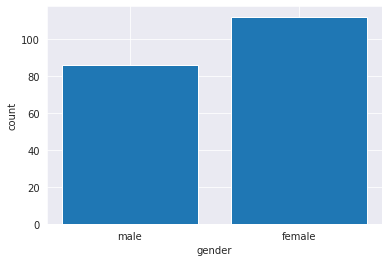

In [ ]:
m=0
f=0
for i in k['Gender']:
  if(i=="Male"):
    m=m+1
  else:
    f=f+1
x=[1,2]
height=[m,f]
labels=['male','female']
y=np.arange(0.2,100)
plt.bar(x,height,align='center')#for vertical graph
plt.xticks(x,labels)#to get labels on x axis
plt.xlabel("gender")
plt.ylabel("count")
plt.show()


Female customers are than male customers

**Normalising the Age & Annual Income**

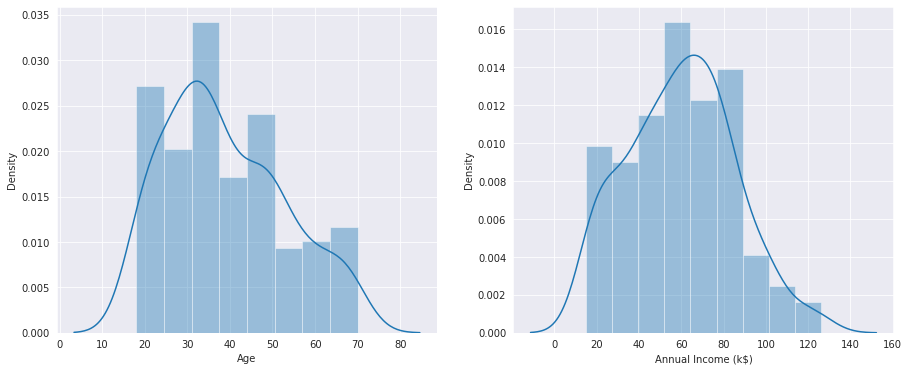

<Figure size 720x432 with 0 Axes>

In [ ]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(k['Age'])
plt.subplot(1,2,2)
sns.distplot(k['Annual Income (k$)'])
plt.show()

plt.figure(figsize=(10,6))
sns.set_style('darkgrid')


**Scatter Plot of AGE-Annual Income & SpendingScore-Annual Income**

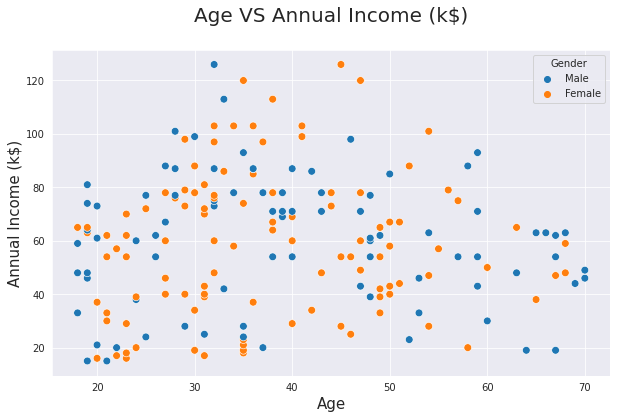

In [ ]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')

sns.scatterplot(data=k, x="Age", y= "Annual Income (k$)", hue="Gender", s=60)
plt.title("Age VS Annual Income (k$)\n", fontsize=20)
plt.xlabel("Age", fontsize=15)
plt.ylabel("Annual Income (k$)", fontsize=15)
plt.show()

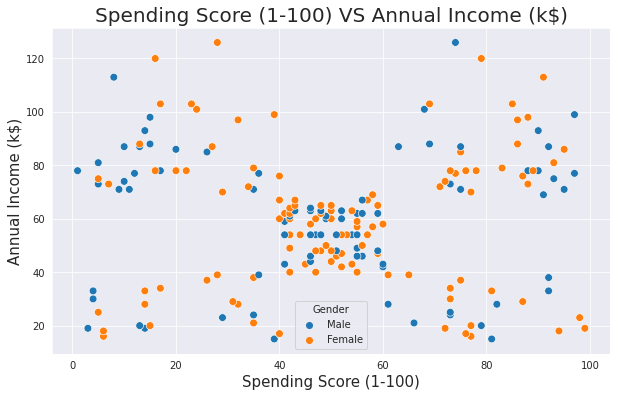

In [ ]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')

sns.scatterplot(data=k, x="Spending Score (1-100)", y= "Annual Income (k$)", hue="Gender", s=60)
plt.title("Spending Score (1-100) VS Annual Income (k$)", fontsize=20)
plt.xlabel("Spending Score (1-100)", fontsize=15)
plt.ylabel("Annual Income (k$)", fontsize=15)
plt.show()

Some relationship between annual income & spending score

In [ ]:
Age_20_30 = k.Age[(k.Age>=20) & (k.Age<=30)]
Age_31_40 = k.Age[(k.Age>=31) & (k.Age<=40)]
Age_41_50 = k.Age[(k.Age>=41) & (k.Age<=50)]
Age_51_60 = k.Age[(k.Age>=51) & (k.Age<=60)]
Age_61_Above = k.Age[(k.Age>=61)]

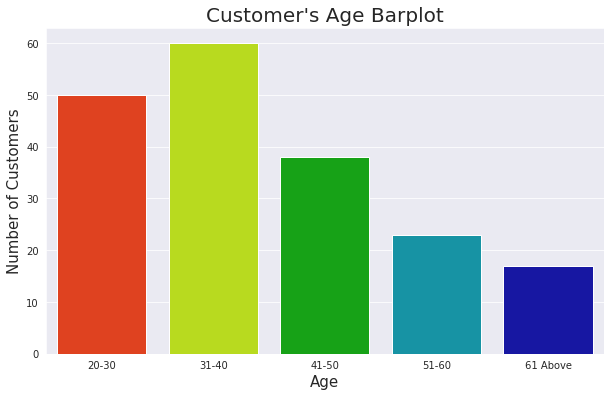

In [ ]:
x = ["20-30","31-40","41-50","51-60","61 Above"]
y = [len(Age_20_30.values),len(Age_31_40.values),len(Age_41_50.values),len(Age_51_60.values),len(Age_61_Above.values)]

plt.figure(figsize=(10,6))
sns.barplot(x=x, y=y, palette="nipy_spectral_r")
plt.title("Customer's Age Barplot", fontsize=20)
plt.xlabel("Age", fontsize=15)
plt.ylabel("Number of Customers", fontsize=15)
plt.show()

More customers in age 30-40

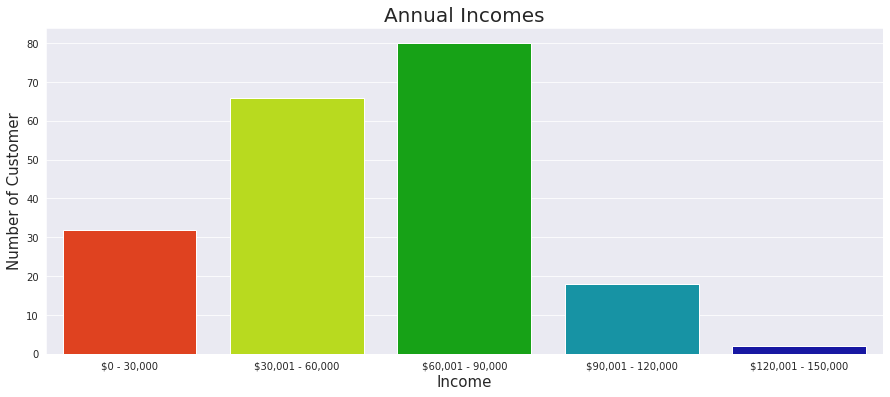

In [ ]:
ai0_30 = k["Annual Income (k$)"][(k["Annual Income (k$)"] >= 0) & (k["Annual Income (k$)"] <= 30)]
ai31_60 = k["Annual Income (k$)"][(k["Annual Income (k$)"] >= 31) & (k["Annual Income (k$)"] <= 60)]
ai61_90 = k["Annual Income (k$)"][(k["Annual Income (k$)"] >= 61) & (k["Annual Income (k$)"] <= 90)]
ai91_120 = k["Annual Income (k$)"][(k["Annual Income (k$)"] >= 91) & (k["Annual Income (k$)"] <= 120)]
ai121_150 = k["Annual Income (k$)"][(k["Annual Income (k$)"] >= 121) & (k["Annual Income (k$)"] <= 150)]

income_x = ["$0 - 30,000", "$30,001 - 60,000", "$60,001 - 90,000", "$90,001 - 120,000", "$120,001 - 150,000"]
income_y = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=income_x, y=income_y, palette="nipy_spectral_r")
plt.title("Annual Incomes", fontsize=20)
plt.xlabel("Income", fontsize=15)
plt.ylabel("Number of Customer", fontsize=15)
plt.show()

More customers  with annual income 60K-90K

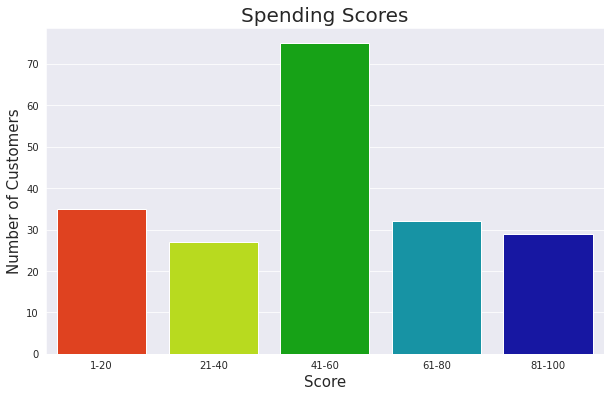

In [ ]:
ss1_20 = k["Spending Score (1-100)"][(k["Spending Score (1-100)"] >= 1) & (k["Spending Score (1-100)"] <= 20)]
ss21_40 = k["Spending Score (1-100)"][(k["Spending Score (1-100)"] >= 21) & (k["Spending Score (1-100)"] <= 40)]
ss41_60 = k["Spending Score (1-100)"][(k["Spending Score (1-100)"] >= 41) & (k["Spending Score (1-100)"] <= 60)]
ss61_80 = k["Spending Score (1-100)"][(k["Spending Score (1-100)"] >= 61) & (k["Spending Score (1-100)"] <= 80)]
ss81_100 = k["Spending Score (1-100)"][(k["Spending Score (1-100)"] >= 81) & (k["Spending Score (1-100)"] <= 100)]

score_x = ["1-20", "21-40", "41-60", "61-80", "81-100"]
score_y = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(10,6))
sns.barplot(x=score_x, y=score_y,palette="nipy_spectral_r")
plt.title("Spending Scores", fontsize=20)
plt.xlabel("Score", fontsize=15)
plt.ylabel("Number of Customers", fontsize=15)
plt.show()

More customers with spending score 41-60

**Using KMeans() to craete clusters**

Rescaling the data

In [ ]:
k_scaled = k[["Age","Annual Income (k$)","Spending Score (1-100)"]]

# Class instance
scaler = StandardScaler()

# Fit_transform
k_scaled_fit = scaler.fit_transform(k_scaled)
k_scaled_fit = pd.DataFrame(k_scaled_fit)
k_scaled_fit.columns = ["Age","Annual Income (k$)","Spending Score (1-100)"]
k_scaled_fit.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.425414,-1.779171,-0.435989
1,-1.282367,-1.779171,1.199413
2,-1.353890,-1.739447,-1.720949
3,-1.139319,-1.739447,1.043661
4,-0.567131,-1.699723,-0.397051


In [ ]:
var_list_1 = k_scaled_fit[["Age","Annual Income (k$)","Spending Score (1-100)"]]
var_list_1.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.425414,-1.779171,-0.435989
1,-1.282367,-1.779171,1.199413
2,-1.353890,-1.739447,-1.720949
3,-1.139319,-1.739447,1.043661
4,-0.567131,-1.699723,-0.397051


Taking 4 clusters randomly

In [ ]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(var_list_1)

kmeans.labels_

array([2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2,
       2, 3, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 2, 0, 2, 2, 2, 3, 3, 3, 3, 2, 0, 1, 1, 0, 1, 0, 1, 3, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
      dtype=int32)

In [ ]:
ssd = []

for num_clusters in range(1,11):
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(var_list_1)
    
    ssd.append(kmeans.inertia_)

**Choosing optimum no. of clusters with elbow plot**

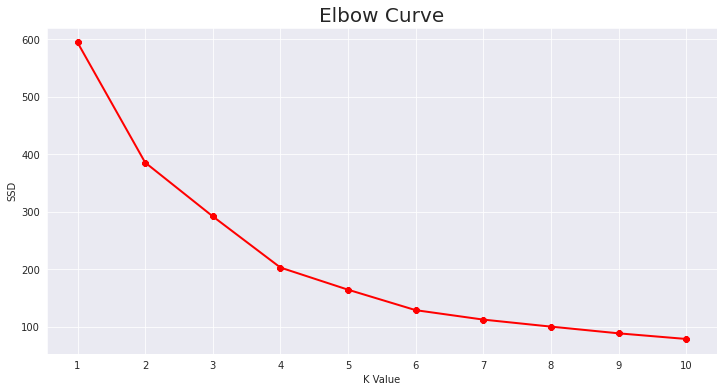

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(range(1,11), ssd, linewidth=2, color="red", marker ="8")
plt.title("Elbow Curve", fontsize=20)
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("SSD")

plt.show()

Optimum no. of clusters=5

**Generating labels for clusters**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, max_iter=50)
kmeans.fit(var_list_1)
print(kmeans.labels_)

[3 3 0 3 3 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 4 3 0 3 0 3 4 3 3 3 4 3 3 4 4 4 4 4 3 4 4 3 4 4 4 3 4 4 3 3 4 4 4 4
 4 3 4 4 3 4 4 3 4 4 3 4 4 3 3 4 4 3 4 4 3 3 4 3 4 3 3 4 4 3 4 3 4 4 4 4 4
 3 2 3 3 3 4 4 4 4 3 2 1 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 4 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [ ]:
k["Label"] = kmeans.labels_
k.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),z_score,Label
0,1,Male,19,15,39,-1.738999,3
1,2,Male,21,15,81,-1.738999,3
2,3,Female,20,16,6,-1.700830,0
3,4,Female,23,16,77,-1.700830,3
4,5,Female,31,17,40,-1.662660,3


**Plotting 5 clusters**

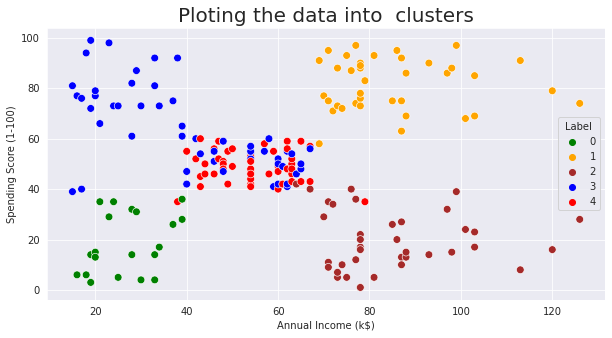

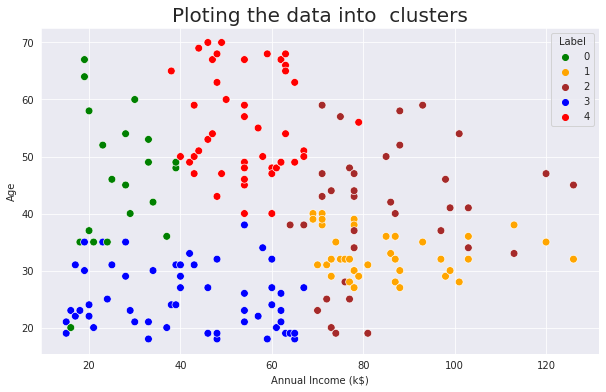

In [ ]:
plt.figure(figsize=(10,5))

plt.title("Ploting the data into  clusters", fontsize=20)
sns.scatterplot(data=k, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Label", s=60, palette=['green','orange','brown','blue','red'])
plt.show()

plt.figure(figsize=(10,6))

plt.title("Ploting the data into  clusters", fontsize=20)
sns.scatterplot(data=k, x="Annual Income (k$)", y="Age", hue="Label", s=60, palette=['green','orange','brown','blue','red'])
plt.show()

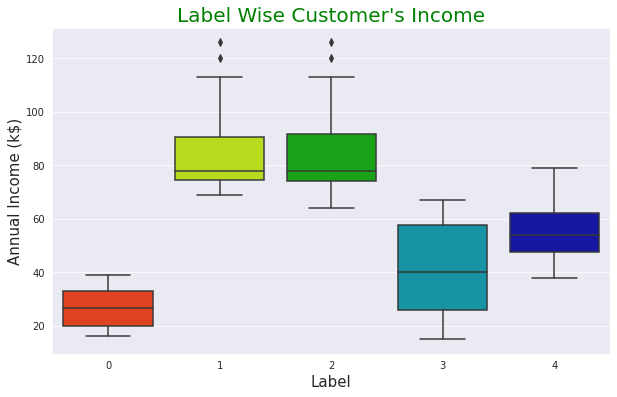

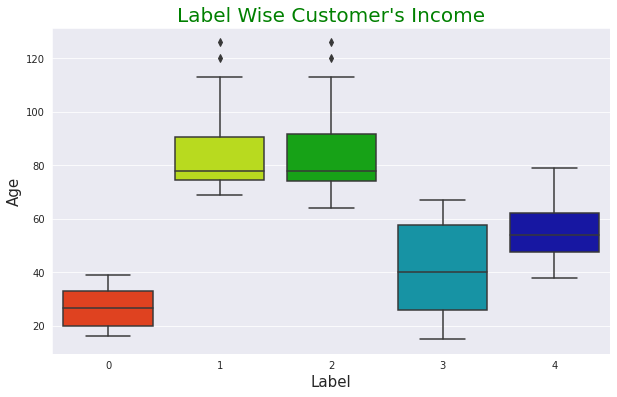

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Label', y='Annual Income (k$)', data=k, palette="nipy_spectral_r")
plt.title("Label Wise Customer's Income", fontsize=20, color="green")
plt.xlabel(xlabel="Label", fontsize=15)
plt.ylabel(ylabel="Annual Income (k$)",fontsize=15)
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='Label', y='Annual Income (k$)', data=k, palette="nipy_spectral_r")
plt.title("Label Wise Customer's Income", fontsize=20, color="green")
plt.xlabel(xlabel="Label", fontsize=15)
plt.ylabel(ylabel="Age",fontsize=15)
plt.show()

There are more customers in age 30-50 

In [ ]:
# Getting the CustomerId for each group

cust1 = df[df.Label==0]
print("The number of customers in 1st group = ", len(cust1))
print("The Customer Id are - ", cust1.CustomerID.values)
print("============================================================================================\n")

cust2 = df[df.Label==1]
print("The number of customers in 2nd group = ", len(cust2))
print("The Customer Id are - ", cust2.CustomerID.values)
print("============================================================================================\n")

cust3 = df[df.Label==1]
print("The number of customers in 2nd group = ", len(cust3))
print("The Customer Id are - ", cust3.CustomerID.values)
print("============================================================================================\n")

cust4 = df[df.Label==1]
print("The number of customers in 2nd group = ", len(cust4))
print("The Customer Id are - ", cust4.CustomerID.values)
print("============================================================================================\n")

cust5 = df[df.Label==1]
print("The number of customers in 2nd group = ", len(cust5))
print("The Customer Id are - ", cust5.CustomerID.values)
print("============================================================================================\n")

cust6 = df[df.Label==1]
print("The number of customers in 2nd group = ", len(cust2))
print("The Customer Id are - ", cust6.CustomerID.values)
print("============================================================================================\n")


The number of customers in 1st group =  24
The Customer Id are -  [ 1  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46]

The number of customers in 2nd group =  45
The Customer Id are -  [ 41  47  51  54  55  56  57  58  60  61  63  64  65  67  68  71  72  73
  74  75  77  80  81  83  84  86  87  90  91  93  97  99 102 103 105 107
 108 109 110 111 117 118 119 120 161]

The number of customers in 2nd group =  45
The Customer Id are -  [ 41  47  51  54  55  56  57  58  60  61  63  64  65  67  68  71  72  73
  74  75  77  80  81  83  84  86  87  90  91  93  97  99 102 103 105 107
 108 109 110 111 117 118 119 120 161]

The number of customers in 2nd group =  45
The Customer Id are -  [ 41  47  51  54  55  56  57  58  60  61  63  64  65  67  68  71  72  73
  74  75  77  80  81  83  84  86  87  90  91  93  97  99 102 103 105 107
 108 109 110 111 117 118 119 120 161]

The number of customers in 2nd group =  45
The Customer Id are -  [ 41  47  51  54  55  56  57  58  60  61

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print("ConfusionMatrix",confusion_matrix(k['Label'],kmeans.labels_))
print(classification_report(k['Label'],kmeans.labels_))

ConfusionMatrix [[20  0  0  0  0]
 [ 0 39  0  0  0]
 [ 0  0 38  0  0]
 [ 0  0  0 54  0]
 [ 0  0  0  0 47]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        38
           3       1.00      1.00      1.00        54
           4       1.00      1.00      1.00        47

    accuracy                           1.00       198
   macro avg       1.00      1.00      1.00       198
weighted avg       1.00      1.00      1.00       198

